
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/data-science-workshop-2021/blob/main/40--spark/99--analysis.ipynb)

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz -O spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

In [1]:
!pip install -q pyspark findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.0-bin-hadoop3.2"

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Spark dataframe")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()
sc = spark.sparkContext

21/12/11 07:36:53 WARN Utils: Your hostname, Jakubs-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.8.8 instead (on interface en0)
21/12/11 07:36:53 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/12/11 07:36:54 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
21/12/11 07:36:55 WARN Utils: Service 'SparkUI' could not bind on port 4050. Attempting port 4051.


In [3]:
spark

Once we have our RDD of Row we can infer and register the schema.

In [4]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

/Users/jkanclerz/myplace/dydaktyka/przetwarzanie-dokumnetow/data-science-workshop-2021/.venv/lib/python3.9/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


https://spark.apache.org/docs/latest/sql-data-sources-load-save-functions.html

In [5]:
!mkdir -p var
!wget -c https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv -O var/otomoto.csv

--2021-12-11 07:37:35--  https://s3.eu-central-1.amazonaws.com/jkan.pl/data-science/uek/otomoto.csv
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.168.151
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.168.151|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [6]:
DF = spark.read.load("var/otomoto.csv", format="csv", sep=";", inferSchema="true", header="true")

In [8]:
DF.createOrReplaceTempView("cars")

In [9]:
all_cars = sqlContext.sql("""
    Select przebieg from cars
""")

In [10]:
type(all_cars)

pyspark.sql.dataframe.DataFrame

* https://spark.apache.org/docs/latest/api/java/org/apache/spark/sql/functions.html
* https://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#module-pyspark.sql.functions
* 

In [11]:
from pyspark.sql.functions import *

In [12]:
CARS = DF.select('id','Marka pojazdu', "Model pojazdu", "przebieg", "price", "rok produkcji")
CARS = CARS.dropna()
CARS = CARS.withColumn("przebieg", regexp_replace(CARS['przebieg'], '\s', ''))
CARS = CARS.withColumn("przebieg", regexp_replace(CARS['przebieg'], 'km', ''))
CARS = CARS.withColumn("przebieg", CARS['przebieg'].cast('int'))


In [13]:
CARS.take(10)

[Row(id=6039269187, Marka pojazdu='Renault', Model pojazdu='Fluence', przebieg=172000, price=25900.0, rok produkcji=2013),
 Row(id=6034090022, Marka pojazdu='Mercedes-Benz', Model pojazdu='Klasa G', przebieg=52904, price=434900.0, rok produkcji=2016),
 Row(id=6039268812, Marka pojazdu='Audi', Model pojazdu='A5', przebieg=56000, price=41900.0, rok produkcji=2011),
 Row(id=6039269107, Marka pojazdu='Volkswagen', Model pojazdu='Polo', przebieg=88000, price=14900.0, rok produkcji=2007),
 Row(id=6038674457, Marka pojazdu='Peugeot', Model pojazdu='206 CC', przebieg=176000, price=5900.0, rok produkcji=2001),
 Row(id=6033752462, Marka pojazdu='Volkswagen', Model pojazdu='Bora', przebieg=300000, price=7900.0, rok produkcji=2003),
 Row(id=6035637917, Marka pojazdu='BMW', Model pojazdu='Seria 5', przebieg=301000, price=9800.0, rok produkcji=2002),
 Row(id=6038678372, Marka pojazdu='Audi', Model pojazdu='Q5', przebieg=155400, price=98900.0, rok produkcji=2013),
 Row(id=6039268967, Marka pojazdu='H

In [14]:
CARS.show()

+----------+-------------+--------------+--------+--------+-------------+
|        id|Marka pojazdu| Model pojazdu|przebieg|   price|rok produkcji|
+----------+-------------+--------------+--------+--------+-------------+
|6039269187|      Renault|       Fluence|  172000| 25900.0|         2013|
|6034090022|Mercedes-Benz|       Klasa G|   52904|434900.0|         2016|
|6039268812|         Audi|            A5|   56000| 41900.0|         2011|
|6039269107|   Volkswagen|          Polo|   88000| 14900.0|         2007|
|6038674457|      Peugeot|        206 CC|  176000|  5900.0|         2001|
|6033752462|   Volkswagen|          Bora|  300000|  7900.0|         2003|
|6035637917|          BMW|       Seria 5|  301000|  9800.0|         2002|
|6038678372|         Audi|            Q5|  155400| 98900.0|         2013|
|6039268967|      Hyundai|      Santa Fe|  124500| 14480.0|         2004|
|6039268802|   Volkswagen|          Golf|   95100| 64900.0|         2014|
|6039266742|         Jeep|Grand Cherok

In [15]:
CARS.printSchema()

root
 |-- id: long (nullable = true)
 |-- Marka pojazdu: string (nullable = true)
 |-- Model pojazdu: string (nullable = true)
 |-- przebieg: integer (nullable = true)
 |-- price: double (nullable = true)
 |-- rok produkcji: integer (nullable = true)



In [16]:
from pyspark.sql.functions import udf
udf?

In [18]:
lowercase_name = udf(lambda x: x.lower(), "string")

In [19]:
CARS = CARS.withColumn("Marka pojazdu", lowercase_name(CARS["Marka pojazdu"]))
CARS = CARS.withColumn("Model pojazdu", lowercase_name(CARS["Model pojazdu"]))

In [20]:
CARS = CARS.withColumnRenamed("Marka pojazdu", 'marka') \
    .withColumnRenamed("Model pojazdu", 'model') \
    .withColumnRenamed("rok produkcji", 'rok')

In [21]:
CARS.take(10)

Traceback (most recent call last):
  File "/Users/jkanclerz/myplace/dydaktyka/przetwarzanie-dokumnetow/data-science-workshop-2021/40--spark/spark-3.2.0-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/daemon.py", line 186, in manager
  File "/Users/jkanclerz/myplace/dydaktyka/przetwarzanie-dokumnetow/data-science-workshop-2021/40--spark/spark-3.2.0-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/daemon.py", line 74, in worker
  File "/Users/jkanclerz/myplace/dydaktyka/przetwarzanie-dokumnetow/data-science-workshop-2021/40--spark/spark-3.2.0-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/worker.py", line 663, in main
    if read_int(infile) == SpecialLengths.END_OF_STREAM:
  File "/Users/jkanclerz/myplace/dydaktyka/przetwarzanie-dokumnetow/data-science-workshop-2021/40--spark/spark-3.2.0-bin-hadoop3.2/python/lib/pyspark.zip/pyspark/serializers.py", line 564, in read_int
    raise EOFError
EOFError


[Row(id=6039269187, marka='renault', model='fluence', przebieg=172000, price=25900.0, rok=2013),
 Row(id=6034090022, marka='mercedes-benz', model='klasa g', przebieg=52904, price=434900.0, rok=2016),
 Row(id=6039268812, marka='audi', model='a5', przebieg=56000, price=41900.0, rok=2011),
 Row(id=6039269107, marka='volkswagen', model='polo', przebieg=88000, price=14900.0, rok=2007),
 Row(id=6038674457, marka='peugeot', model='206 cc', przebieg=176000, price=5900.0, rok=2001),
 Row(id=6033752462, marka='volkswagen', model='bora', przebieg=300000, price=7900.0, rok=2003),
 Row(id=6035637917, marka='bmw', model='seria 5', przebieg=301000, price=9800.0, rok=2002),
 Row(id=6038678372, marka='audi', model='q5', przebieg=155400, price=98900.0, rok=2013),
 Row(id=6039268967, marka='hyundai', model='santa fe', przebieg=124500, price=14480.0, rok=2004),
 Row(id=6039268802, marka='volkswagen', model='golf', przebieg=95100, price=64900.0, rok=2014)]

In [22]:
price_millage = CARS.select("rok", "przebieg").toPandas()

<AxesSubplot:>

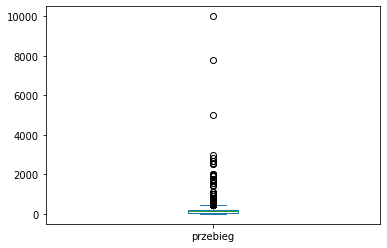

In [23]:
(price_millage['przebieg']/1000).plot.box()

In [26]:
years = CARS.select("rok").toPandas()

<AxesSubplot:ylabel='Frequency'>

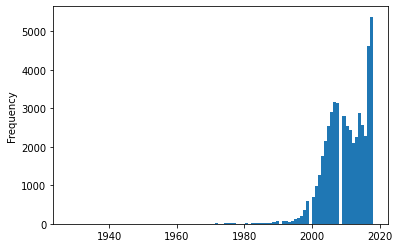

In [27]:
years['rok'].sort_values() \
    .plot(kind='hist', bins = 100)

In [28]:
by_brand = CARS.select("marka").groupBy("marka").count().toPandas()

In [29]:
type(by_brand)

pandas.core.frame.DataFrame

In [30]:
len(by_brand)

87

In [31]:
CARS.count()

50610

In [32]:
CARS_S = CARS.sample(True, 0.1)

In [33]:
CARS_S.count()

4989

<AxesSubplot:ylabel='marka'>

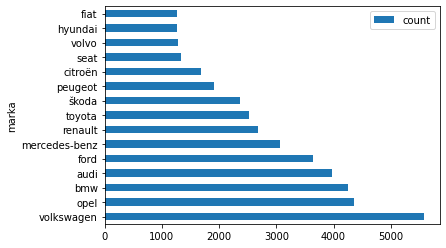

In [34]:
by_brand.index = by_brand['marka']
by_brand.sort_values(by='count', ascending=False)[:15].plot.barh()

In [35]:
przebieg_data = CARS.select('przebieg').toPandas()

In [36]:
przebieg_data['przebieg'] = przebieg_data['przebieg'] / 1000

In [37]:
przebieg_data.describe()

,przebieg
count,50610.000000
mean,134.374310
std,119.935487
min,0.001000
25%,39.763250
50%,143.000000
75%,200.000000
max,9999.999000


In [38]:
przebieg_data = przebieg_data[przebieg_data['przebieg'] < 500]

In [39]:
przebieg_data.describe()

,przebieg
count,50541.000000
mean,132.634068
std,94.311727
min,0.001000
25%,39.460000
50%,142.642000
75%,200.000000
max,499.011000


In [40]:
przebieg_data['przebieg']

0        172.000
1         52.904
2         56.000
3         88.000
4        176.000
          ...   
50605    230.000
50606    160.700
50607    128.486
50608      0.005
50609    139.000
Name: przebieg, Length: 50541, dtype: float64

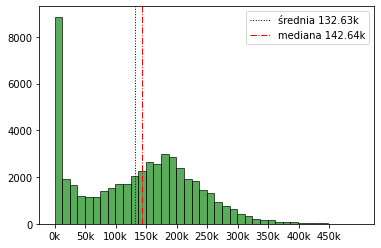

In [41]:
import matplotlib.pyplot as plt
import numpy as np
plt_data = przebieg_data['przebieg']
H, xedges, yedges = plt.hist(plt_data, bins=40, color='green', edgecolor='k', alpha=0.65)

av_line = plt.axvline(plt_data.mean(), color='k', linestyle=':', linewidth=1)
med_line = plt.axvline(plt_data.median(), color='red', linestyle='-.', linewidth=1)

plt.legend([av_line, med_line], ["średnia {0:.2f}k".format(plt_data.mean()), "mediana {0:.2f}k".format(plt_data.median())])

xlabels = map(lambda x: "{}k".format(int(x/1000)) ,np.arange(0, 500000, 50000))
plt.xticks(np.arange(0, 500000, 50000)/1000, xlabels)

plt.show()

In [42]:
top_marki = CARS.select("marka").groupBy("marka").count()\
    .sort("count", ascending=False)\
    .limit(12) \
    .collect()

In [43]:
top_marki = [row.marka for row in top_marki]

In [44]:
top_marki

['volkswagen',
 'opel',
 'bmw',
 'audi',
 'ford',
 'mercedes-benz',
 'renault',
 'toyota',
 'škoda',
 'peugeot',
 'citroën',
 'seat']

In [45]:
CARS = CARS.withColumn('przebieg_k', CARS['przebieg'] / 1000)

In [46]:
CARS.take(10)

[Row(id=6039269187, marka='renault', model='fluence', przebieg=172000, price=25900.0, rok=2013, przebieg_k=172.0),
 Row(id=6034090022, marka='mercedes-benz', model='klasa g', przebieg=52904, price=434900.0, rok=2016, przebieg_k=52.904),
 Row(id=6039268812, marka='audi', model='a5', przebieg=56000, price=41900.0, rok=2011, przebieg_k=56.0),
 Row(id=6039269107, marka='volkswagen', model='polo', przebieg=88000, price=14900.0, rok=2007, przebieg_k=88.0),
 Row(id=6038674457, marka='peugeot', model='206 cc', przebieg=176000, price=5900.0, rok=2001, przebieg_k=176.0),
 Row(id=6033752462, marka='volkswagen', model='bora', przebieg=300000, price=7900.0, rok=2003, przebieg_k=300.0),
 Row(id=6035637917, marka='bmw', model='seria 5', przebieg=301000, price=9800.0, rok=2002, przebieg_k=301.0),
 Row(id=6038678372, marka='audi', model='q5', przebieg=155400, price=98900.0, rok=2013, przebieg_k=155.4),
 Row(id=6039268967, marka='hyundai', model='santa fe', przebieg=124500, price=14480.0, rok=2004, prze

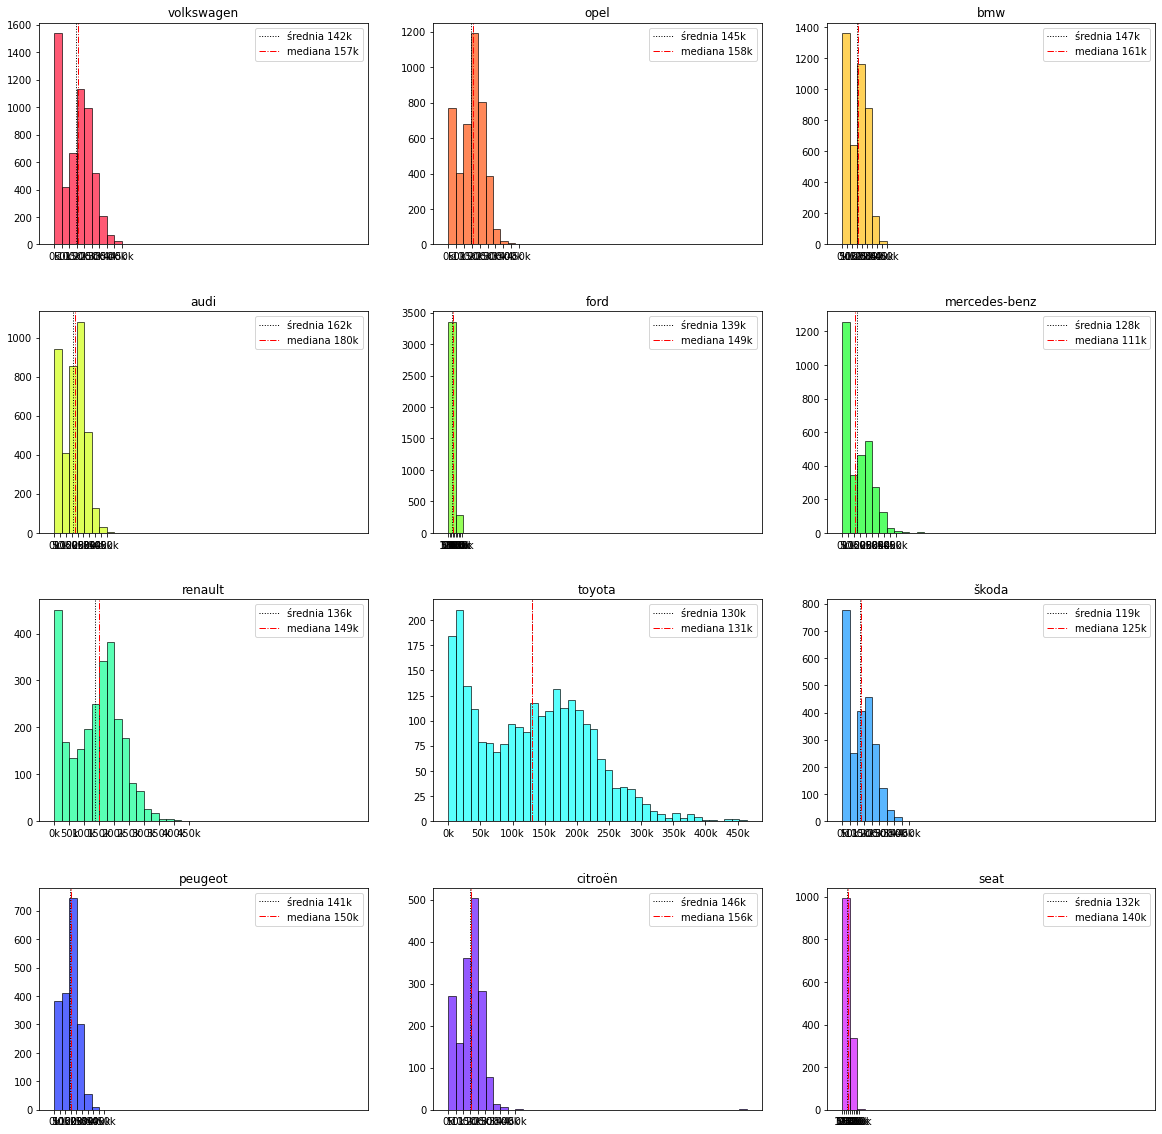

In [47]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import cm

pylab.rcParams['figure.figsize'] = 30, 20 

import math
from itertools import chain

def get_df_for_brand(brand):
    return CARS.select('przebieg') \
        .filter(CARS['marka'] == brand)\
        .toPandas()['przebieg']

fig, axes = plt.subplots(math.ceil(len(top_marki) / 3), 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.3)

draws = chain.from_iterable(axes)
datas = map(lambda marka: (marka, get_df_for_brand(marka)), top_marki)
NUM_COLORS = len(top_marki)
cm = pylab.get_cmap('gist_rainbow')
cgen = (cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS))

for marka, data_przebiegi in datas:
    try:
        ax = next(draws)

        ax.hist(data_przebiegi, bins=40, color=next(cgen), edgecolor='k', alpha=0.65)
        
        xes = np.arange(0, 500000, 50000)
        xlabels = list(map(lambda x: "{0:.0f}k".format(x/1000) , xes))
        ax.set_xticks(xes)
        ax.set_xticklabels(xlabels)

        av_line = ax.axvline(data_przebiegi.mean(), color='k', linestyle=':', linewidth=1)
        med_line = ax.axvline(data_przebiegi.median(), color='red', linestyle='-.', linewidth=1)
        
        ax.legend([av_line, med_line], ["średnia {0:.0f}k".format(data_przebiegi.mean()/1000), "mediana {0:.0f}k".format(data_przebiegi.median()/1000)])
        ax.set_title(marka)
        
    except StopIteration as e:
        break

while True:
    try:
        ax = next(draws)
        ax.set_visible(False)
    except StopIteration as e:
        break

plt.show()

In [48]:
sc.stop()